In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mse
from sklearn.metrics import r2_score 

Read The Iris_clean.csv

In [2]:
df = pd.read_csv('C:\\Users\\Owner\\Downloads\\1- Machine Learning\\Iris_clean.csv')
df.head()

,s_l,s_w,p_l,p_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Drop species

In [3]:
df.drop('species', axis =1, inplace = True)
df.head()

,s_l,s_w,p_l,p_w
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


Find the correlation metrix

In [2]:
df.corr()

NameError: name 'df' is not defined

Plot the scatter plot for each pair of variables in the dataset

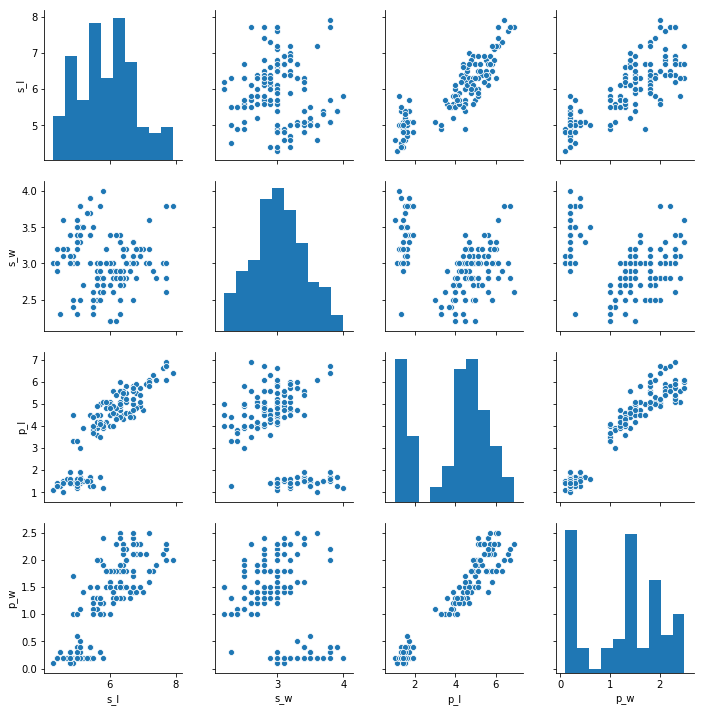

In [5]:
sns.pairplot(df)

Plot the Heat Map

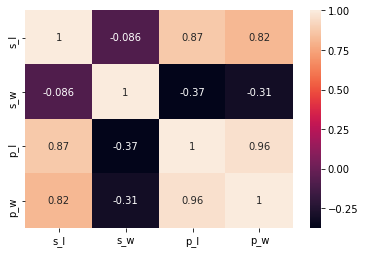

In [6]:
relation =df.corr()
relation_index=relation.index
sns.heatmap(df[relation_index].corr(),annot=True)

# Linear Regression

Use the highest correlated feature to p_w to build an univariate regression model to predict p_w

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['p_l']],
    df[['p_w']],
    test_size=0.3,
    random_state=0)



In [8]:
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

What are the model coefficients?

In [9]:
a = model.coef_
c = model.intercept_

print(a,c)

[[0.41987599]] [-0.37531361]


Apply the model on the test set

In [10]:
y_pred = model.predict(X_test)



Evaluate the model

In [11]:
print ('mse: ', mse(y_test, y_pred), ', R2 Score: ', r2_score(y_test, y_pred))

mse:  0.15029400719549044 , R2 Score:  0.9352044513024969


Plot the scatter plot of p_l and p_w and draw the regression line

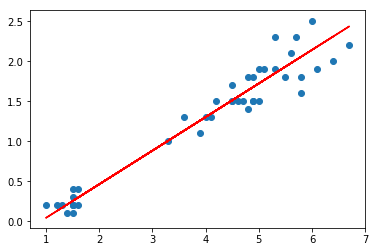

In [12]:
plt.scatter(X_test, y_test)

plt.plot(X_test , a*X_test+c, color = 'r')

Predict p_w if p_l = 7.1

In [13]:
model.predict(np.array([[7.1]]))

array([[2.60580589]])

Build a Linear Regression to predict p_w with two features s_l, p_l

Split the data set to train and test 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['s_l','p_l']],
    df[['p_w']],
    test_size=0.3,
    random_state=0)

Apply and evaluate the model

In [15]:
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print ('mse: ', mse(y_test, predictions), ', R2 Score: ', r2_score(y_test, predictions))

mse:  0.146164626459859 , R2 Score:  0.9398193249066126


What is the coefficients of the model?

In [16]:
a = model.coef_
c = model.intercept_
print(a,c)

[[-0.03871646  0.43578579]] [-0.20865154]


Plot the scatter plot of y_test and the prediction

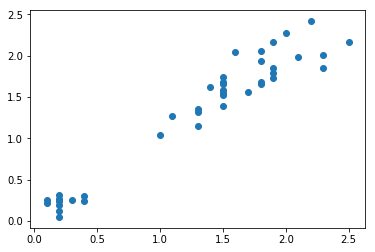

In [17]:
plt.scatter(y_test, predictions)


Predict the p_w if s_l = 3,  p_l = 5

In [18]:
model.predict(np.array([[3, 5]]))

array([[1.85412804]])